# 로지스틱 회귀를 활용해
# 챔피언 조합을 넣으면 승률을 구해주는 함수 구현

In [1]:
#필요라이브러리 다운로드 
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import platform 

#한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

#그래프에서 마이너스 표시되게
matplotlib.rcParams['axes.unicode_minus']=False

import pandas_profiling
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

import statsmodels.api as sm

# 1. 모델 피팅

In [2]:
# 데이터 로드 
df = pd.read_csv("master_logit.csv")
df

,matchId,red_Aatrox,red_Ahri,red_Akali,red_Akshan,red_Alistar,red_Amumu,red_Anivia,red_Annie,red_Aphelios,...,blue_Yasuo,blue_Yone,blue_Yorick,blue_Yuumi,blue_Zac,blue_Zed,blue_Ziggs,blue_Zilean,blue_Zoe,blue_Zyra
0,KR_4870274470,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,KR_4901175026,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,KR_4944273316,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,KR_4944293028,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,KR_4975317218,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25624,KR_5560971377,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25625,KR_5560971639,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25626,KR_5560972397,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
25627,KR_5560981091,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [3]:
data = df.drop(['win','matchId'], axis = 'columns')
label = df['win']
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.2, random_state=11)

In [4]:
# 로지스틱 회귀 모델 생성
import statsmodels.api as sm
logit_m = sm.Logit(y_train, X_train)
logit_m_train = logit_m.fit(method='powell')

Optimization terminated successfully.
         Current function value: 0.681261
         Iterations: 3
         Function evaluations: 9258


C:\Users\sh921\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [5]:
Y_predict = logit_m_train.predict(X_test)
print(Y_predict)

16032    0.473513
10865    0.489198
12066    0.458400
20179    0.489287
14015    0.526691
           ...   
24310    0.471470
24062    0.469467
22391    0.536435
6074     0.543936
13951    0.446917
Length: 5126, dtype: float64


<AxesSubplot:>

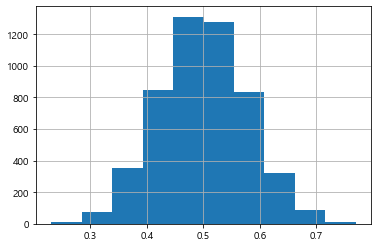

In [6]:
Y_predict.hist()

In [7]:
def cut_off(y,threshold):
    Y = y.copy() # copy함수를 사용하여 이전의 y값이 변화지 않게 함
    Y[Y>threshold]=1
    Y[Y<=threshold]=0
    return(Y.astype(int))

Y_predict_t = cut_off(Y_predict,0.5)

accuracy = accuracy_score(y_test, Y_predict_t)
print('Accuracy : {0:.3f}'.format(accuracy))

Accuracy : 0.518


# 2. 어떤 조합이 승률이 가장 높을까?

In [8]:
combined_df = pd.concat([X_test, y_test,Y_predict], axis=1) 

In [9]:
bestcombination = combined_df.loc[combined_df[0].idxmax()]
print('가장 승률이 좋은 조합')
print('승률: ',bestcombination[0])
print (bestcombination.loc[bestcombination == 1])

가장 승률이 좋은 조합
승률:  0.7698404097141959
red_Elise       1.0
red_Leblanc     1.0
red_Sivir       1.0
red_Sylas       1.0
red_Tristana    1.0
blue_Ashe       1.0
blue_Illaoi     1.0
blue_Khazix     1.0
blue_Poppy      1.0
blue_Sona       1.0
Name: 17104, dtype: float64


In [10]:
worstcombination = combined_df.loc[combined_df[0].idxmin()]
print('가장 승률이 나쁜 조합')
print('승률: ',worstcombination[0])
print (worstcombination.loc[worstcombination == 1])

가장 승률이 나쁜 조합
승률:  0.23112620309630738
red_Camille        1.0
red_Galio          1.0
red_Janna          1.0
red_MissFortune    1.0
red_Qiyana         1.0
blue_Alistar       1.0
blue_Ezreal        1.0
blue_Gragas        1.0
blue_Jayce         1.0
blue_Ryze          1.0
Name: 1237, dtype: float64


# 3. 챔피언 이름을 입력받아 승률을 구해주는 함수 구현

In [11]:
champList = ['아트록스', '아리', '아칼리', '아크샨', '알리스타', '아무무', '애니비아', '애니', '아펠리오스', '애쉬', '아우렐리온솔', 
             '아지르', '바드', '블리츠크랭크', '브랜드', '브라움', '케이틀린', '카밀', '카시오페아', '초가스', '코르키', '다리우스', 
             '다이애나', '문도박사', '드레이븐', '에코', '엘리스', '이블린', '이즈리얼', '피들스틱', '피오라', '피즈', '갈리오', 
             '갱플랭크', '가렌', '나르', '그라가스', '그레이브즈', '그웬', '헤카림', '하이머딩거', '일라오이', '이렐리아', '아이번', 
             '잔나', '자르반 4세', '잭스', '제이스', '징크스', '진', '카이사', '칼리스타', '카르마', '카서스', '카사딘', '카타리나', 
             '케일', '케인', '케넨', '카직스', '킨드레드', '클레드', '코그모', '르블랑', '리신', '레오나', '릴리아', '리산드라', 
             '루시안', '룰루', '럭스', '말파이트', '말자하', '마오카이', '마스터이', '미스포춘', '오공', '모데카이저', '모르가나', 
             '나미', '나서스', '노틸러스', '니코', '니달리', '녹턴', '누누', '올라프', '오리아나', '오른', '판테온', '뽀삐', '파이크', 
             '키아나', '퀸', '라칸', '람머스', '렉사이', '렐', '레넥톤', '렝가', '리븐', '럼블', '라이즈', '사미라', '세주아니', 
             '세나', '세라핀', '세트', '샤코', '쉔', '쉬바나', '신지드', '사이온', '시비르', '스카너', '소나', '소라카', '스웨인', 
             '사일러스', '신드라', '탐켄치', '탈리야', '탈론', '타릭', '티모', '쓰레쉬', '트리스타나', '트런들', '트린다미어', 
             '트위스티드페이트', '트위치', '우디르', '우르곳', '바루스', '베인', '베이가', '벨코즈', '벡스', '바이', '비에고', 
             '빅토르', '블라디미르', '볼리베어', '워윅', '자야', '제라스', '신짜오', '야스오', '요네', '요릭', '유미', '자크', '제드', 
             '직스', '질리언', '조이', '자이라' ]

In [12]:
def champ_odd(blue,red): 
    X_test_blue = []
    for i in champList:
        if i in blue: X_test_blue.append(1)
        else: X_test_blue.append(0)
    
    X_test_red = []
    for i in champList:
        if i in red: X_test_red.append(1)
        else: X_test_red.append(0)
            
    X_test = X_test_blue + X_test_red
        
    Y_predict = logit_m_train.predict(X_test)       
    print(Y_predict)

# 4. test

In [14]:
blue = [x for x in input('Blue 팀의 챔피언 이름을 입력해주세요: ').split()]
red = [x for x in input('Red 팀의 챔피언 이름을 입력해주세요: ').split()]
print('승률: ')
champ_odd(blue, red)

Blue 팀의 챔피언 이름을 입력해주세요: 케인 케넨 카직스 킨드레드 클레드
Red 팀의 챔피언 이름을 입력해주세요: 야스오 요네 요릭 유미 자크
승률: 
[0.51850523]
